In [2]:
!mkdir dataset

mkdir: cannot create directory ‘dataset’: File exists


In [3]:
!kaggle datasets download -d abdallahalidev/plantvillage-dataset

Dataset URL: https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset
License(s): CC-BY-NC-SA-4.0
plantvillage-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [1]:
from zipfile import ZipFile
dataset='/content/plantvillage-dataset.zip'
with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('the dataset is extracted')

the dataset is extracted


In [2]:
import numpy as np
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
import pickle
import cv2
from os import listdir
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation, Flatten, Dropout, Dense, BatchNormalization, Conv2D
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.compat.v1.keras.layers import BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import pandas as pd
from glob import glob
from tensorflow.keras.utils import load_img, img_to_array

In [3]:
import os


ROOT_DIRECTORY = '/content/plantvillage dataset/'

# Example: Use images from the 'color' folder ,since there are 3 folders
IMAGE_TYPE = 'color'
DIRECTORY = os.path.join(ROOT_DIRECTORY, IMAGE_TYPE)

CLASSES = [folder for folder in os.listdir(DIRECTORY) if os.path.isdir(os.path.join(DIRECTORY, folder))]

In [4]:

BATCH_SIZE=32
IMAGE_SIZE=256
CHANNELS=3
EPOCHS=20

In [10]:

import shutil

CLASSES = [ 'Potato___Early_blight','Potato___Late_blight', 'Potato___healthy', 'Apple___Apple_scab','Apple___Black_rot', 'Apple___healthy','Apple___Cedar_apple_rust', 'Grape___Black_rot','Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)','Grape___healthy']

all_classes = os.listdir(DIRECTORY)

#deleting extra classes
for class_name in all_classes:
    if class_name not in CLASSES:
        class_path = os.path.join(DIRECTORY, class_name)
        shutil.rmtree(class_path)
        print(f"Deleted class: {class_name}")

print("Classes deleted successfully.")


Classes deleted successfully.


In [11]:


data = []
for class_name in CLASSES:
    class_path = os.path.join(DIRECTORY, class_name)
    images = os.listdir(class_path)
    images = images[:500]  

    for image_name in images:
        try:
            image_path = os.path.join(class_path, image_name)

            print(f"Processing: {image_path}")

            arr = cv2.imread(image_path)
            arr = cv2.resize(arr, (IMAGE_SIZE, IMAGE_SIZE))
            print(f"Image shape: {arr.shape}")

            label = CLASSES.index(class_name)

            data.append([arr, label])

        except Exception as e:
            print(f"Error processing {image_path}: {e}")

print(f"Total images loaded: {len(data)}")


Streaming output truncated to the last 5000 lines.
Image shape: (256, 256, 3)
Processing: /content/plantvillage dataset/color/Apple___healthy/c0eef36a-242b-4420-9153-198446da57d4___RS_HL 7478.JPG
Image shape: (256, 256, 3)
Processing: /content/plantvillage dataset/color/Apple___healthy/98cfff90-4edc-4b41-b834-09d18d1c08ca___RS_HL 6142.JPG
Image shape: (256, 256, 3)
Processing: /content/plantvillage dataset/color/Apple___healthy/2d1542c5-6771-4433-a912-313e77945d85___RS_HL 5683.JPG
Image shape: (256, 256, 3)
Processing: /content/plantvillage dataset/color/Apple___healthy/0460b7aa-4eb0-4c0b-80e5-055ced6684a3___RS_HL 6287.JPG
Image shape: (256, 256, 3)
Processing: /content/plantvillage dataset/color/Apple___healthy/4cf06978-a0b5-43a0-8da3-fda45eee2e1c___RS_HL 5777.JPG
Image shape: (256, 256, 3)
Processing: /content/plantvillage dataset/color/Apple___healthy/ec274680-0ee1-49d4-af42-48c6fe0da457___RS_HL 7306.JPG
Image shape: (256, 256, 3)
Processing: /content/plantvillage dataset/color/Appl

In [12]:
print(len(data))


4850


In [13]:
import random
random.shuffle(data)


In [14]:

X = []
y = []
for feature, label in data:
  X.append(feature)
  y.append(label)

In [15]:

X = np.array(X)
y = np.array(y)

In [16]:
X.shape
y.shape

(4850,)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [18]:
from tensorflow.keras import layers

In [19]:

# X = X/255
resize_and_recale = Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1./255),
])


In [20]:
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Dropout
from tensorflow.keras import models

In [21]:
input_shape = (BATCH_SIZE,IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
num_classes=15
model = models.Sequential([
    resize_and_recale,
    layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),

    layers.Dense(64, activation='relu'),
    layers.Dense(num_classes, activation='softmax'),
])

model.build(input_shape=input_shape)


In [22]:
model.compile(
              loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy']
              )

In [23]:
 from tensorflow.keras.callbacks import ModelCheckpoint

# # Define the checkpoint callback
 checkpoint_callback = ModelCheckpoint(filepath='best_model_weights.h5',
                                       save_best_only=True,
                                       save_weights_only=True,
                                       monitor='val_loss',
                                       mode='min',
                                       verbose=1)

In [24]:

unique_labels = np.unique(y_train)
print("Unique Labels:", unique_labels)


Unique Labels: [ 0  1  2  3  4  5  6  7  8  9 10]


In [25]:
r = model.fit(X_train,y_train, epochs=EPOCHS, batch_size=32, validation_split=0.2)

Epoch 1/20
110/110 [==============================] - 501s 5s/step - loss: 2.1112 - accuracy: 0.2411 - val_loss: 1.4566 - val_accuracy: 0.4914
Epoch 2/20
110/110 [==============================] - 491s 4s/step - loss: 1.0831 - accuracy: 0.6134 - val_loss: 0.8150 - val_accuracy: 0.7056
Epoch 3/20
110/110 [==============================] - 474s 4s/step - loss: 0.6864 - accuracy: 0.7592 - val_loss: 0.6853 - val_accuracy: 0.7778
Epoch 4/20
110/110 [==============================] - 485s 4s/step - loss: 0.4639 - accuracy: 0.8399 - val_loss: 0.7464 - val_accuracy: 0.7583
Epoch 5/20
110/110 [==============================] - 496s 5s/step - loss: 0.4005 - accuracy: 0.8600 - val_loss: 0.4007 - val_accuracy: 0.8660
Epoch 6/20
110/110 [==============================] - 513s 5s/step - loss: 0.2472 - accuracy: 0.9178 - val_loss: 0.3941 - val_accuracy: 0.8706
Epoch 7/20
110/110 [==============================] - 485s 4s/step - loss: 0.1963 - accuracy: 0.9350 - val_loss: 0.3363 - val_accuracy: 0.8946

In [26]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

16/16 [==============================] - 18s 1s/step - loss: 0.3177 - accuracy: 0.9031


accuracy= 90.31%

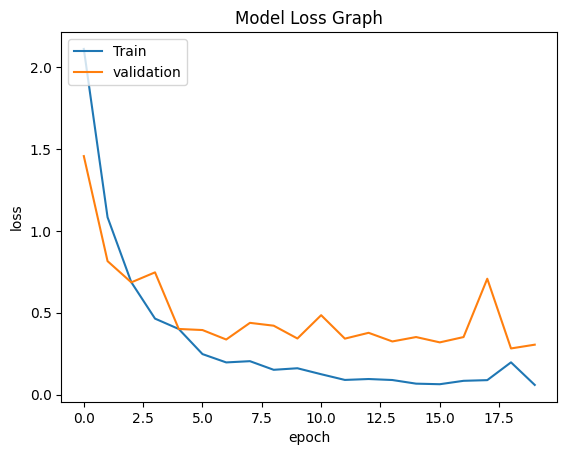

In [27]:
plt.plot(r.history['loss'])
plt.plot(r.history['val_loss'])
plt.title('Model Loss Graph')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train','validation',],loc='upper left')
plt.show()

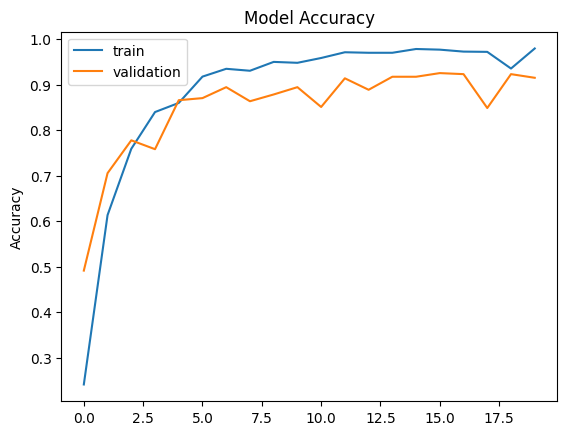

In [28]:
plt.plot(r.history['accuracy'])
plt.plot(r.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.legend(['train','validation'],loc='upper left')
plt.show()

In [29]:
def predict(model, img):
    img_array = image.img_to_array(img)
    img_array = expand_dims(img_array, 0)
    predictions = model.predict(img_array)

    predicted_class = CLASSES[np.argmax(predictions[0])]
    confidence = round(100*(np.max(predictions[0])),2)
    return predicted_class, confidence

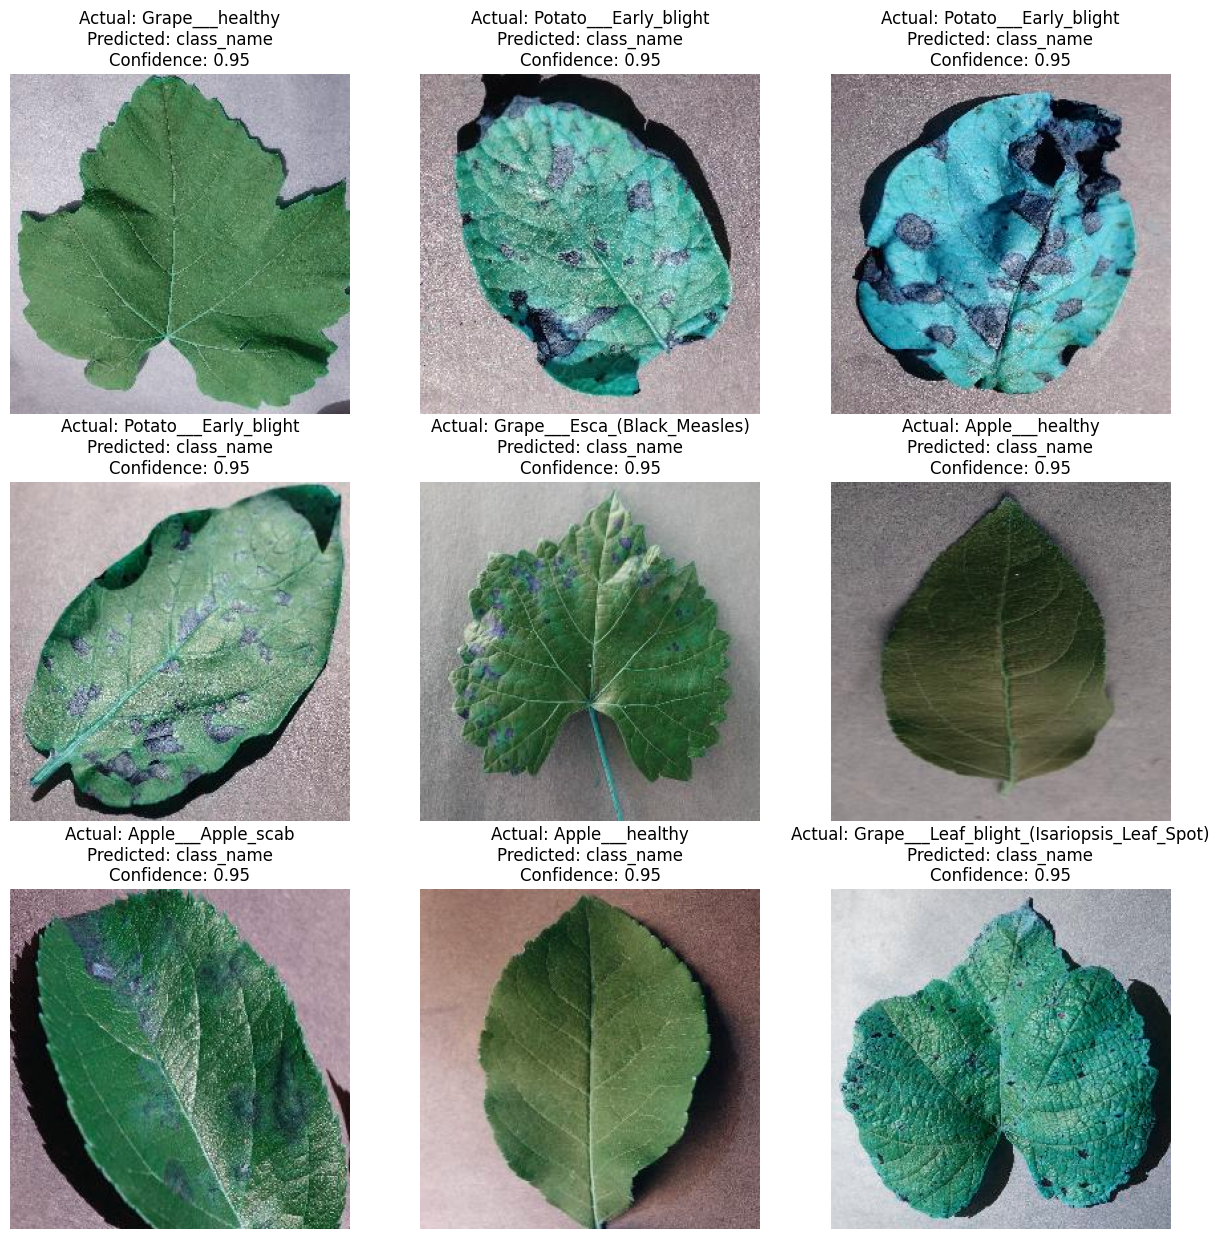

In [31]:
plt.figure(figsize=(15, 15))


def predict(model, image):
#example
    predicted_class = "class_name"
    confidence = 0.95
    return predicted_class, confidence

for index, image in enumerate(X_test[:9]):
    ax = plt.subplot(3, 3, index + 1)

    plt.imshow(image)

    predicted_class, confidence = predict(model, image)

    label = y_test[index]
    actual_class = CLASSES[label]

    plt.title(f'Actual: {actual_class}\nPredicted: {predicted_class}\nConfidence: {confidence:.2f}')

    plt.axis('off')

plt.show()

In [33]:
import pickle

In [34]:
filename ='trained.sav'
pickle.dump(model, open(filename, 'wb'))